In [4]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [5]:
n = 10
r = 7

In [6]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0])
Prior = np.vectorize(Prior)

In [7]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [8]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [9]:
p = np.linspace(0,1,100)
Pos = Posterior(p,r,n)

In [10]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [11]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:01<00:00, 5509.80it/s]


<IPython.core.display.Javascript object>


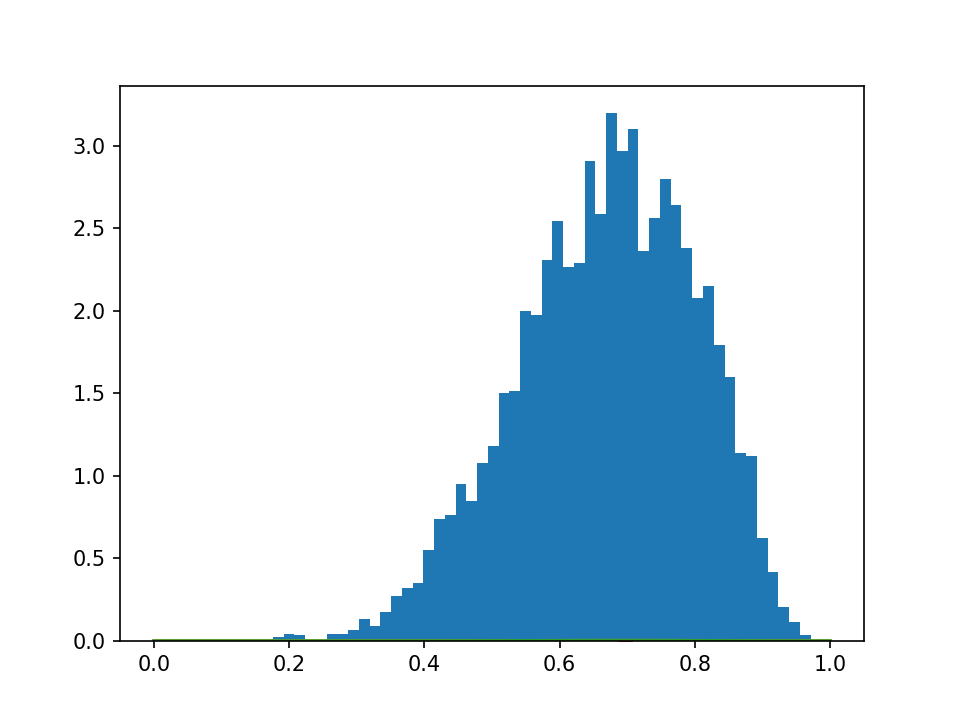

(array([0.02096348, 0.04192695, 0.03493913, 0.00698783, 0.        ,
        0.04192695, 0.04192695, 0.06289043, 0.13276868, 0.09084173,
        0.17469563, 0.27252518, 0.32143995, 0.34939125, 0.55203818,
        0.74070946, 0.76167293, 0.95034421, 0.84552683, 1.07612506,
        1.18094243, 1.50238239, 1.51635804, 1.99851796, 1.97755449,
        2.30598227, 2.54356832, 2.26405532, 2.29200662, 2.90693522,
        2.58549527, 3.20042387, 2.96982565, 3.10259432, 2.36188487,
        2.56453179, 2.80211784, 2.64139787, 2.38284834, 2.07538404,
        2.15225012, 1.79587104, 1.60021194, 1.13901548, 1.11805201,
        0.62191643, 0.4192695 , 0.20264693, 0.1118052 , 0.03493913]),
 array([0.17593134, 0.19183201, 0.20773268, 0.22363336, 0.23953403,
        0.2554347 , 0.27133537, 0.28723604, 0.30313671, 0.31903738,
        0.33493806, 0.35083873, 0.3667394 , 0.38264007, 0.39854074,
        0.41444141, 0.43034209, 0.44624276, 0.46214343, 0.4780441 ,
        0.49394477, 0.50984544, 0.52574612, 0.

In [12]:
plt.hist(MCMC,density=True,bins=50)

In [16]:
maxi =  Pos[0]
x_m = p[0]
for i in range(len(Pos)):
    if Pos[i]>maxi:
        maxi = Pos[i]
        x_m = p[i]
maxx = [x_m,maxi]
maxx

[0.696969696969697, 0.002223081851969984]

In [18]:
plt.plot(p,Pos)
plt.scatter(x_m,maxi,c='r')

In [19]:
liminf = np.percentile(MCMC,16)
limsum = np.percentile(MCMC,84)
mediana = np.percentile(MCMC,50)
upperlimit = np.percentile(MCMC,95)

In [24]:
print('La moneda está truncada dado que la media calculada muestra que la probabilidad de cara o sello no es 50-50, sino',mediana)

La moneda está truncada dado que la media calculada muestra que la probabilidad de cara o sello no es 50-50, sino 0.6785154832916878
